# Proportion Plots

> A guide to plot proportion plots with binary data.

- order: 4

<div style="padding: 15px; border: 1px solid transparent; border-color: transparent; margin-bottom: 20px; border-radius: 4px; color: #31708f; background-color: #d9edf7; border-color: #bce8f1;"> As of v2023.02.14, DABEST can be used to generate Cohen's *h* and the corresponding proportion plot for binary data. It's important to note that the code we provide only supports numerical proportion data, 
where the values are limited to 0 (failure) and 1 (success). This means that the code is not suitable for 
analyzing proportion data that contains non-numeric values, such as strings like 'yes' and 'no'. </div>


## Load libraries

In [ ]:
import numpy as np
import pandas as pd
import dabest

print("We're using DABEST v{}".format(dabest.__version__))

Pre-compiling numba functions for DABEST...


Compiling numba functions: 100%|██████████| 11/11 [00:00<00:00, 59.05it/s]

Numba compilation complete!
We're using DABEST v2025.10.20


In [ ]:
#| hide
import warnings
warnings.filterwarnings("ignore", category=UserWarning) # to suppress warnings related to points not being able to be plotted due to dot size
warnings.filterwarnings("ignore", category=FutureWarning) # to suppress warnings related to points not being able to be plotted due to dot size

## Creating a demo dataset

In [ ]:
def create_demo_prop_dataset(seed=9999, N=40):
    import numpy as np
    import pandas as pd

    np.random.seed(9999)  # Fix the seed to ensure reproducibility of results.
    # Create samples
    n = 1
    c1 = np.random.binomial(n, 0.2, size=N)
    c2 = np.random.binomial(n, 0.2, size=N)
    c3 = np.random.binomial(n, 0.8, size=N)

    t1 = np.random.binomial(n, 0.6, size=N)
    t2 = np.random.binomial(n, 0.2, size=N)
    t3 = np.random.binomial(n, 0.3, size=N)
    t4 = np.random.binomial(n, 0.4, size=N)
    t5 = np.random.binomial(n, 0.5, size=N)
    t6 = np.random.binomial(n, 0.6, size=N)
    t7 = np.ones(N)
    t8 = np.zeros(N)
    t9 = np.zeros(N)

    # Add a `gender` column for coloring the data.
    females = np.repeat('Female', N / 2).tolist()
    males = np.repeat('Male', N / 2).tolist()
    gender = females + males

    # Add an `id` column for paired data plotting.
    id_col = pd.Series(range(1, N + 1))

    # Combine samples and gender into a DataFrame.
    df = pd.DataFrame({'Control 1': c1, 'Test 1': t1,
                       'Control 2': c2, 'Test 2': t2,
                       'Control 3': c3, 'Test 3': t3,
                       'Test 4': t4, 'Test 5': t5, 'Test 6': t6,
                       'Test 7': t7, 'Test 8': t8, 'Test 9': t9,
                       'Gender': gender, 'ID': id_col
                       })

    return df
df = create_demo_prop_dataset()
df.head()

,Control 1,Test 1,Control 2,Test 2,Control 3,Test 3,Test 4,Test 5,Test 6,Test 7,Test 8,Test 9,Gender,ID
0,1,0,0,0,1,0,0,1,0,1.0,0.0,0.0,Female,1
1,0,1,0,1,1,1,0,0,0,1.0,0.0,0.0,Female,2
2,0,1,0,0,1,0,1,1,0,1.0,0.0,0.0,Female,3
3,0,1,0,0,1,0,0,1,0,1.0,0.0,0.0,Female,4
4,0,0,0,0,1,0,0,0,1,1.0,0.0,0.0,Female,5


### Helper function to create a binary table - `dabest.prop_dataset` 

In DABEST **v2024.3.29**, we incorporated feedback from biologists who may not have tables of 0’s and 1’s readily available. As a result, a convenient function  - `dabest.prop_dataset` - to generate a binary dataset based on the specified sample sizes is provided. Users can generate a pandas.DataFrame containing the sample sizes for each element in the groups and the group names (optional if the sample sizes are provided in a dict).

In [ ]:
sample_size_1 = {'a':[3, 4], 'b':[2, 5]}
sample_size_2 = [3, 4, 2, 5]
names = ['a', 'b']
sample_df_1 = dabest.prop_dataset(sample_size_1)
sample_df_2 = dabest.prop_dataset(sample_size_2, names)
print(all(sample_df_1 == sample_df_2))
sample_df_1.head()

True


,a,b,ID
0,0,0,1
1,0,0,2
2,0,1,3
3,1,1,4
4,1,1,5


## Loading data

When loading data, you need to set the parameter ``proportional=True``.

In [ ]:
two_groups_unpaired = dabest.load(df, idx=("Control 1", "Test 1"), proportional=True)
two_groups_unpaired

DABEST v2025.10.20
                  
Good afternoon!
The current time is Fri Oct 17 15:27:40 2025.

Effect size(s) with 95% confidence intervals will be computed for:
1. Test 1 minus Control 1

5000 resamples will be used to generate the effect size bootstraps.

## Effect sizes

To generate a proportion plot, the **dabest** library features two effect sizes:

  - Mean difference (``mean_diff``)
  - [Cohen's h](https://en.wikipedia.org/wiki/Cohen's_h) (`cohens＿h`)

These are attributes of the ``Dabest`` object.

In [ ]:
two_groups_unpaired.mean_diff

DABEST v2025.10.20
                  
Good afternoon!
The current time is Fri Oct 17 15:27:43 2025.

The unpaired mean difference between Control 1 and Test 1 is 0.575 [95%CI 0.35, 0.725].
The p-value of the two-sided permutation t-test is 0.0, calculated for legacy purposes only. 

5000 bootstrap samples were taken; the confidence interval is bias-corrected and accelerated.
Any p-value reported is the probability of observing theeffect size (or greater),
assuming the null hypothesis of zero difference is true.
For each p-value, 5000 reshuffles of the control and test labels were performed.

To get the results of all valid statistical tests, use `.mean_diff.statistical_tests`

Let's compute the *Cohen's h* for our comparison.

In [ ]:
two_groups_unpaired.cohens_h

DABEST v2025.10.20
                  
Good afternoon!
The current time is Fri Oct 17 15:27:44 2025.

The unpaired Cohen's h between Control 1 and Test 1 is 1.24 [95%CI 0.784, 1.66].
The p-value of the two-sided permutation t-test is 0.0, calculated for legacy purposes only. 

5000 bootstrap samples were taken; the confidence interval is bias-corrected and accelerated.
Any p-value reported is the probability of observing theeffect size (or greater),
assuming the null hypothesis of zero difference is true.
For each p-value, 5000 reshuffles of the control and test labels were performed.

To get the results of all valid statistical tests, use `.cohens_h.statistical_tests`

## Generating proportion plots

To generate an **estimation plot**, simply use the
``.plot()`` method. 

Each effect size instance has access to the ``.plot()`` method, allowing you to quickly create plots for different effect sizes with ease.

### Unpaired proportion plots

Unpaired proportion plots utilise the common bar plot. The bar plot displays the proportion of observations in the dataset that belong to the category of interest: 

- The white portion represents the proportion of observations that do not belong to the category (proportion of 0s in the data). 
- The colored portion represents the proportion of observations belonging to the category (proportion of 1s in the data).

#### Two-Group

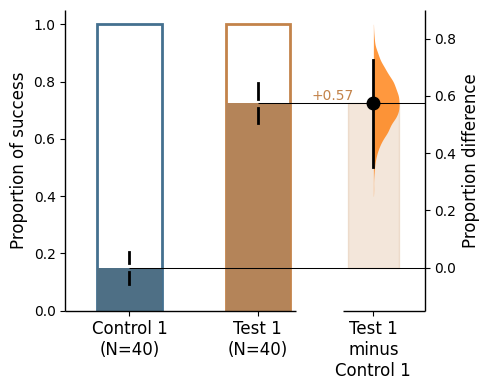

In [ ]:
two_groups_unpaired.mean_diff.plot();

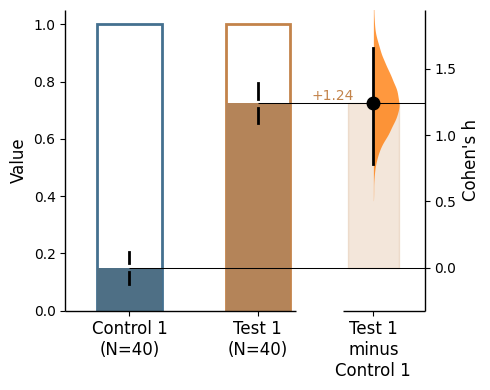

In [ ]:
two_groups_unpaired.cohens_h.plot();

Instead of a Gardner-Altman plot, you can generate a **Cumming estimation plot** by setting ``float_contrast=False`` in the ``.plot()`` method. This will plot the bootstrap effect sizes below the raw data.

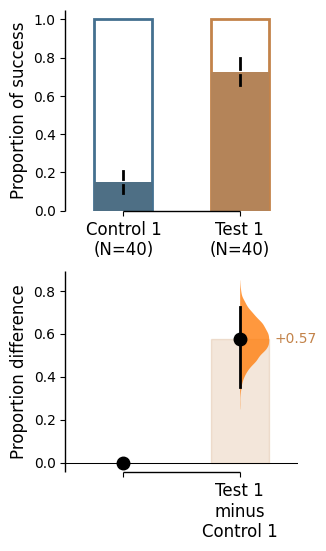

In [ ]:
two_groups_unpaired.mean_diff.plot(float_contrast=False);

#### Multi Two-Group, Shared-Control, and Multi Groups
As with regular (non-binary) unpaired data, multi two-group, shared-control, and multi group plots can be generated for binary data.

In [ ]:
multi_two_groups_unpaired = dabest.load(df, idx=(("Control 1", "Test 1"),("Control 2", "Test 2"),("Control 3", "Test 3")),
                                        proportional=True)
multi_two_groups_unpaired

DABEST v2025.10.20
                  
Good afternoon!
The current time is Fri Oct 17 15:27:44 2025.

Effect size(s) with 95% confidence intervals will be computed for:
1. Test 1 minus Control 1
2. Test 2 minus Control 2
3. Test 3 minus Control 3

5000 resamples will be used to generate the effect size bootstraps.

In [ ]:
multi_two_groups_unpaired.mean_diff

DABEST v2025.10.20
                  
Good afternoon!
The current time is Fri Oct 17 15:27:45 2025.

The unpaired mean difference between Control 1 and Test 1 is 0.575 [95%CI 0.35, 0.725].
The p-value of the two-sided permutation t-test is 0.0, calculated for legacy purposes only. 

The unpaired mean difference between Control 2 and Test 2 is 0.025 [95%CI -0.15, 0.15].
The p-value of the two-sided permutation t-test is 0.535, calculated for legacy purposes only. 

The unpaired mean difference between Control 3 and Test 3 is -0.6 [95%CI -0.75, -0.425].
The p-value of the two-sided permutation t-test is 0.0, calculated for legacy purposes only. 

5000 bootstrap samples were taken; the confidence interval is bias-corrected and accelerated.
Any p-value reported is the probability of observing theeffect size (or greater),
assuming the null hypothesis of zero difference is true.
For each p-value, 5000 reshuffles of the control and test labels were performed.

To get the results of all valid 

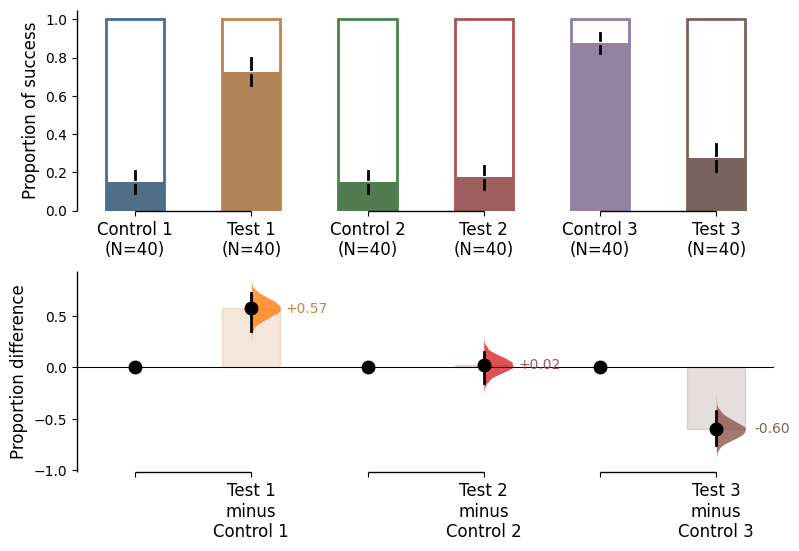

In [ ]:
multi_two_groups_unpaired.mean_diff.plot();

In [ ]:
shared_control = dabest.load(df, idx=("Control 1", "Test 1", "Test 2", "Test 3", "Test 4"),
                                        proportional=True)
shared_control

DABEST v2025.10.20
                  
Good afternoon!
The current time is Fri Oct 17 15:27:45 2025.

Effect size(s) with 95% confidence intervals will be computed for:
1. Test 1 minus Control 1
2. Test 2 minus Control 1
3. Test 3 minus Control 1
4. Test 4 minus Control 1

5000 resamples will be used to generate the effect size bootstraps.

In [ ]:
shared_control.mean_diff

DABEST v2025.10.20
                  
Good afternoon!
The current time is Fri Oct 17 15:27:47 2025.

The unpaired mean difference between Control 1 and Test 1 is 0.575 [95%CI 0.35, 0.725].
The p-value of the two-sided permutation t-test is 0.0, calculated for legacy purposes only. 

The unpaired mean difference between Control 1 and Test 2 is 0.025 [95%CI -0.15, 0.15].
The p-value of the two-sided permutation t-test is 0.539, calculated for legacy purposes only. 

The unpaired mean difference between Control 1 and Test 3 is 0.125 [95%CI -0.025, 0.325].
The p-value of the two-sided permutation t-test is 0.0936, calculated for legacy purposes only. 

The unpaired mean difference between Control 1 and Test 4 is 0.15 [95%CI -0.05, 0.3].
The p-value of the two-sided permutation t-test is 0.0604, calculated for legacy purposes only. 

5000 bootstrap samples were taken; the confidence interval is bias-corrected and accelerated.
Any p-value reported is the probability of observing theeffect si

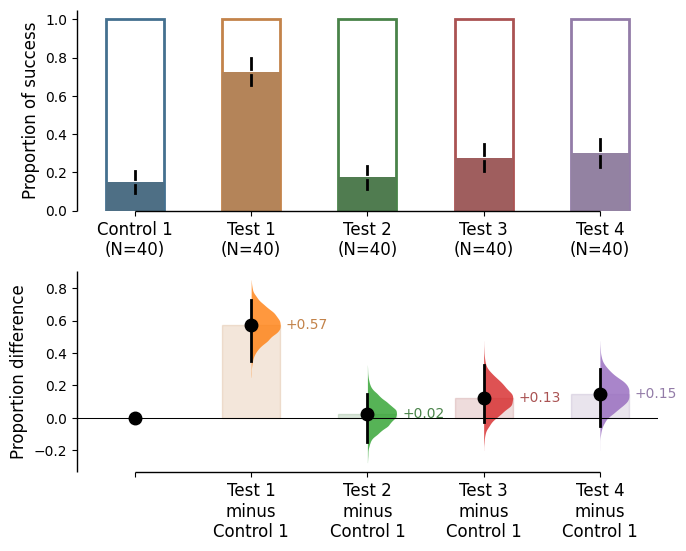

In [ ]:
shared_control.mean_diff.plot();

In [ ]:
multi_groups_unpaired = dabest.load(df, idx=(("Control 1", "Test 1"),("Control 2", "Test 2", "Test 3", "Test 4")),
                                        proportional=True)
multi_groups_unpaired

DABEST v2025.10.20
                  
Good afternoon!
The current time is Fri Oct 17 15:27:47 2025.

Effect size(s) with 95% confidence intervals will be computed for:
1. Test 1 minus Control 1
2. Test 2 minus Control 2
3. Test 3 minus Control 2
4. Test 4 minus Control 2

5000 resamples will be used to generate the effect size bootstraps.

In [ ]:
multi_groups_unpaired.mean_diff

DABEST v2025.10.20
                  
Good afternoon!
The current time is Fri Oct 17 15:27:48 2025.

The unpaired mean difference between Control 1 and Test 1 is 0.575 [95%CI 0.35, 0.725].
The p-value of the two-sided permutation t-test is 0.0, calculated for legacy purposes only. 

The unpaired mean difference between Control 2 and Test 2 is 0.025 [95%CI -0.15, 0.15].
The p-value of the two-sided permutation t-test is 0.535, calculated for legacy purposes only. 

The unpaired mean difference between Control 2 and Test 3 is 0.125 [95%CI -0.05, 0.325].
The p-value of the two-sided permutation t-test is 0.099, calculated for legacy purposes only. 

The unpaired mean difference between Control 2 and Test 4 is 0.15 [95%CI -0.05, 0.3].
The p-value of the two-sided permutation t-test is 0.0604, calculated for legacy purposes only. 

5000 bootstrap samples were taken; the confidence interval is bias-corrected and accelerated.
Any p-value reported is the probability of observing theeffect size

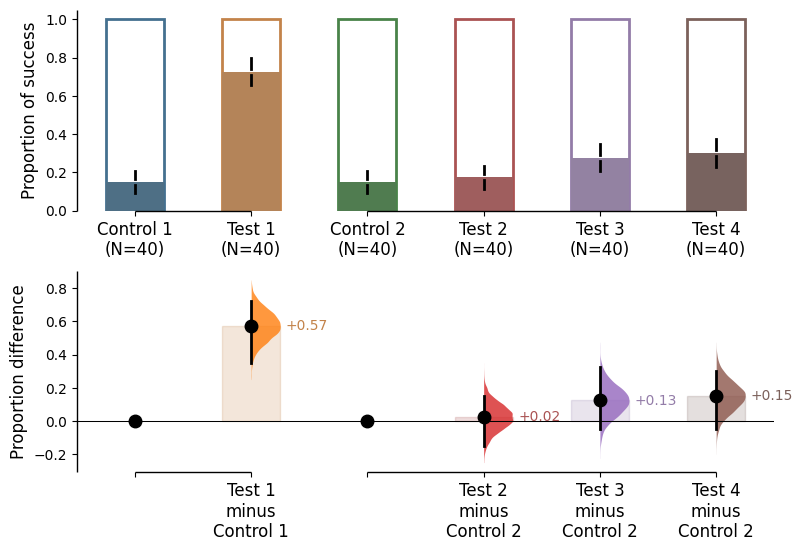

In [ ]:
multi_groups_unpaired.mean_diff.plot();

### Paired proportion plots

For the paired version of the proportion plot, we adopt the style of a Sankey Diagram. The width of each bar in each xtick represents the proportion of the corresponding label in the group, and the strip denotes the paired relationship for each observation.

Starting from **v2024.3.29**, the paired version of the proportion plot receives a major upgrade. We introduce the ``sankey`` and ``flow`` parameters to control the plot. By default, both ``sankey`` and ``flow`` are set to True to cater the needs of repeated measures. When ``sankey`` is set to False, DABEST will generate a bar plot with a similar aesthetic to the paired proportion plot. When ``flow`` is set to False, each group of comparsion forms a Sankey diagram that does not connect to other groups of comparison.

Similar to the unpaired version, the ``.plot()`` method is used to produce an **estimation plot**.


#### Two-Group

In [ ]:
two_groups_paired = dabest.load(df, idx=("Control 1", "Test 1"), 
                                  proportional=True, paired="baseline", id_col="ID")
two_groups_paired

DABEST v2025.10.20
                  
Good afternoon!
The current time is Fri Oct 17 15:27:49 2025.

Paired effect size(s) for repeated measures against baseline 
with 95% confidence intervals will be computed for:
1. Test 1 minus Control 1

5000 resamples will be used to generate the effect size bootstraps.

In [ ]:
two_groups_paired.mean_diff

DABEST v2025.10.20
                  
Good afternoon!
The current time is Fri Oct 17 15:27:49 2025.

The paired mean difference for repeated measures against baseline 
between Control 1 and Test 1 is 0.575 [95%CI 0.325, 0.725].
The p-value of the two-sided permutation t-test is 0.0, calculated for legacy purposes only. 

5000 bootstrap samples were taken; the confidence interval is bias-corrected and accelerated.
Any p-value reported is the probability of observing theeffect size (or greater),
assuming the null hypothesis of zero difference is true.
For each p-value, 5000 reshuffles of the control and test labels were performed.

To get the results of all valid statistical tests, use `.mean_diff.statistical_tests`

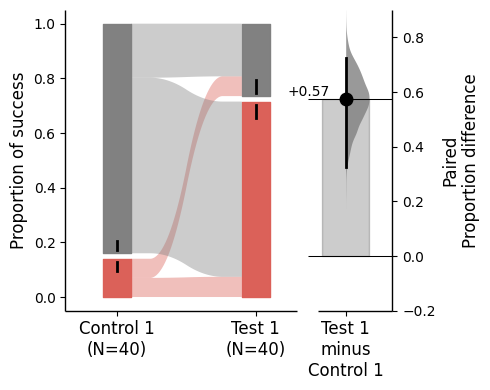

In [ ]:
two_groups_paired.mean_diff.plot();

The Sankey plots for paired proportions also supports the ``float_contrast`` parameter, which can be set to ``False`` to produce a **Cumming estimation plot**.


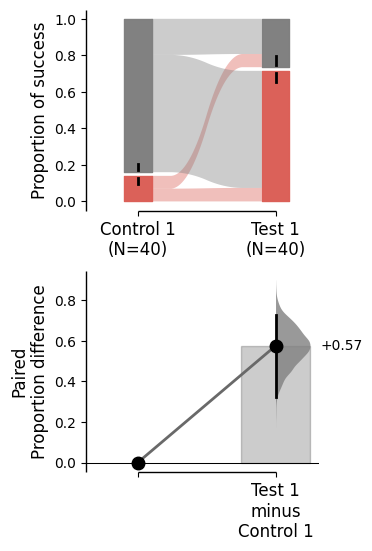

In [ ]:
two_groups_paired.mean_diff.plot(float_contrast=False);

#### Multi Two-Group, Repeated Measures, and Multi Groups
As with regular (non-binary) unpaired data, multi two-group, repeated-measures, and multi group plots can be generated for binary data.

In [ ]:
multi_two_groups_paired = dabest.load(df, idx=(("Control 1", "Test 1"),("Control 2", "Test 2"),("Control 3", "Test 3")),
                                        proportional=True, paired="baseline", id_col="ID")
multi_two_groups_paired

DABEST v2025.10.20
                  
Good afternoon!
The current time is Fri Oct 17 15:27:49 2025.

Paired effect size(s) for repeated measures against baseline 
with 95% confidence intervals will be computed for:
1. Test 1 minus Control 1
2. Test 2 minus Control 2
3. Test 3 minus Control 3

5000 resamples will be used to generate the effect size bootstraps.

In [ ]:
multi_two_groups_paired.mean_diff

DABEST v2025.10.20
                  
Good afternoon!
The current time is Fri Oct 17 15:27:50 2025.

The paired mean difference for repeated measures against baseline 
between Control 1 and Test 1 is 0.575 [95%CI 0.325, 0.725].
The p-value of the two-sided permutation t-test is 0.0, calculated for legacy purposes only. 

The paired mean difference for repeated measures against baseline 
between Control 2 and Test 2 is 0.025 [95%CI -0.15, 0.175].
The p-value of the two-sided permutation t-test is 0.571, calculated for legacy purposes only. 

The paired mean difference for repeated measures against baseline 
between Control 3 and Test 3 is -0.6 [95%CI -0.775, -0.425].
The p-value of the two-sided permutation t-test is 0.0, calculated for legacy purposes only. 

5000 bootstrap samples were taken; the confidence interval is bias-corrected and accelerated.
Any p-value reported is the probability of observing theeffect size (or greater),
assuming the null hypothesis of zero difference is tru

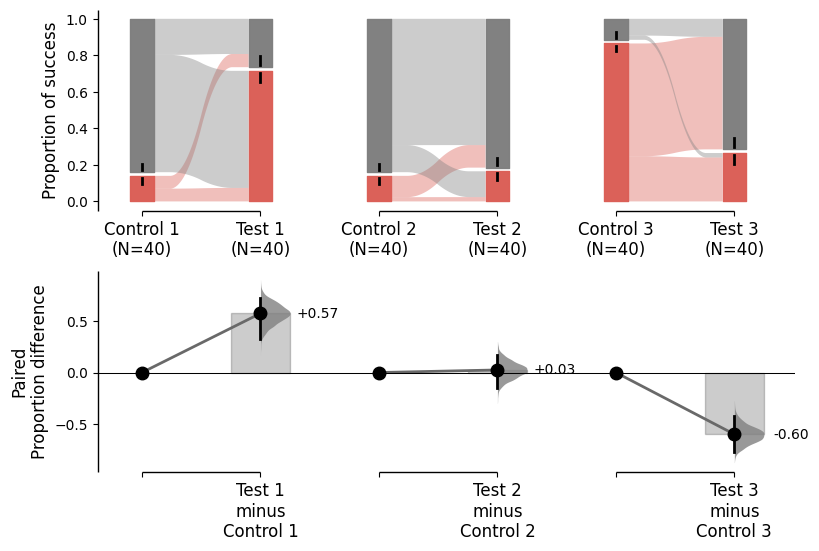

In [ ]:
multi_two_groups_paired.mean_diff.plot();

In [ ]:
repeated_measures_baseline = dabest.load(df, idx=("Control 1", "Test 1", "Test 2", "Test 3", "Test 4"),
                                        proportional=True, paired="baseline", id_col="ID")
repeated_measures_baseline

DABEST v2025.10.20
                  
Good afternoon!
The current time is Fri Oct 17 15:27:50 2025.

Paired effect size(s) for repeated measures against baseline 
with 95% confidence intervals will be computed for:
1. Test 1 minus Control 1
2. Test 2 minus Control 1
3. Test 3 minus Control 1
4. Test 4 minus Control 1

5000 resamples will be used to generate the effect size bootstraps.

In [ ]:
repeated_measures_baseline.mean_diff

DABEST v2025.10.20
                  
Good afternoon!
The current time is Fri Oct 17 15:27:51 2025.

The paired mean difference for repeated measures against baseline 
between Control 1 and Test 1 is 0.575 [95%CI 0.325, 0.725].
The p-value of the two-sided permutation t-test is 0.0, calculated for legacy purposes only. 

The paired mean difference for repeated measures against baseline 
between Control 1 and Test 2 is 0.025 [95%CI -0.15, 0.175].
The p-value of the two-sided permutation t-test is 0.555, calculated for legacy purposes only. 

The paired mean difference for repeated measures against baseline 
between Control 1 and Test 3 is 0.125 [95%CI -0.075, 0.275].
The p-value of the two-sided permutation t-test is 0.277, calculated for legacy purposes only. 

The paired mean difference for repeated measures against baseline 
between Control 1 and Test 4 is 0.15 [95%CI -0.05, 0.325].
The p-value of the two-sided permutation t-test is 0.075, calculated for legacy purposes only. 

5000 

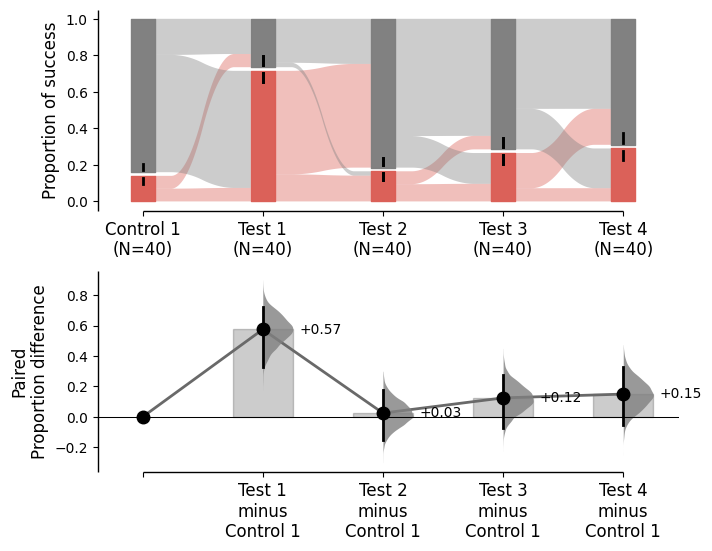

In [ ]:
repeated_measures_baseline.mean_diff.plot();

In [ ]:
repeated_measures_sequential = dabest.load(df, idx=("Control 1", "Test 1", "Test 2", "Test 3", "Test 4"),
                                        proportional=True, paired="sequential", id_col="ID")
repeated_measures_sequential

DABEST v2025.10.20
                  
Good afternoon!
The current time is Fri Oct 17 15:27:52 2025.

Paired effect size(s) for the sequential design of repeated-measures experiment 
with 95% confidence intervals will be computed for:
1. Test 1 minus Control 1
2. Test 2 minus Test 1
3. Test 3 minus Test 2
4. Test 4 minus Test 3

5000 resamples will be used to generate the effect size bootstraps.

In [ ]:
repeated_measures_sequential.mean_diff

DABEST v2025.10.20
                  
Good afternoon!
The current time is Fri Oct 17 15:27:53 2025.

The paired mean difference for the sequential design of repeated-measures experiment 
between Control 1 and Test 1 is 0.575 [95%CI 0.325, 0.725].
The p-value of the two-sided permutation t-test is 0.0, calculated for legacy purposes only. 

The paired mean difference for the sequential design of repeated-measures experiment 
between Test 1 and Test 2 is -0.55 [95%CI -0.725, -0.4].
The p-value of the two-sided permutation t-test is 0.0, calculated for legacy purposes only. 

The paired mean difference for the sequential design of repeated-measures experiment 
between Test 2 and Test 3 is 0.1 [95%CI -0.075, 0.225].
The p-value of the two-sided permutation t-test is 0.342, calculated for legacy purposes only. 

The paired mean difference for the sequential design of repeated-measures experiment 
between Test 3 and Test 4 is 0.025 [95%CI -0.2, 0.2].
The p-value of the two-sided permutation 

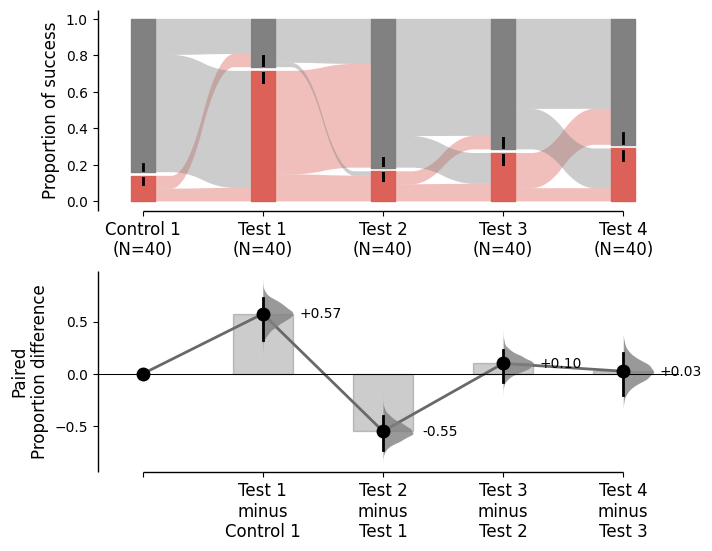

In [ ]:
repeated_measures_sequential.mean_diff.plot();

In [ ]:
multi_groups_baseline = dabest.load(df, idx=(("Control 1", "Test 1"),("Control 2", "Test 2", "Test 3", "Test 4")),
                                        proportional=True, paired="baseline", id_col="ID")
multi_groups_baseline

DABEST v2025.10.20
                  
Good afternoon!
The current time is Fri Oct 17 15:27:53 2025.

Paired effect size(s) for repeated measures against baseline 
with 95% confidence intervals will be computed for:
1. Test 1 minus Control 1
2. Test 2 minus Control 2
3. Test 3 minus Control 2
4. Test 4 minus Control 2

5000 resamples will be used to generate the effect size bootstraps.

In [ ]:
multi_groups_baseline.mean_diff

DABEST v2025.10.20
                  
Good afternoon!
The current time is Fri Oct 17 15:27:54 2025.

The paired mean difference for repeated measures against baseline 
between Control 1 and Test 1 is 0.575 [95%CI 0.325, 0.725].
The p-value of the two-sided permutation t-test is 0.0, calculated for legacy purposes only. 

The paired mean difference for repeated measures against baseline 
between Control 2 and Test 2 is 0.025 [95%CI -0.15, 0.175].
The p-value of the two-sided permutation t-test is 0.571, calculated for legacy purposes only. 

The paired mean difference for repeated measures against baseline 
between Control 2 and Test 3 is 0.125 [95%CI -0.075, 0.3].
The p-value of the two-sided permutation t-test is 0.309, calculated for legacy purposes only. 

The paired mean difference for repeated measures against baseline 
between Control 2 and Test 4 is 0.15 [95%CI -0.025, 0.3].
The p-value of the two-sided permutation t-test is 0.0362, calculated for legacy purposes only. 

5000 bo

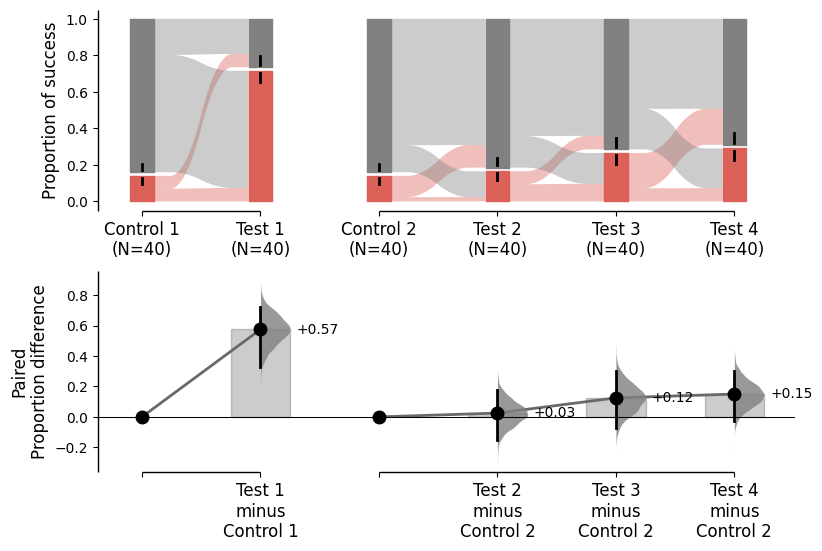

In [ ]:
multi_groups_baseline.mean_diff.plot();

## Aesthetic adjustments

Here we demonstrate a few proportion plot specific aesthetic adjustments.

### Bar Width

You can modify the width of the bar plot bars (unpaired data) by setting the parameter ``bar_width`` in the ``.plot()`` method. 

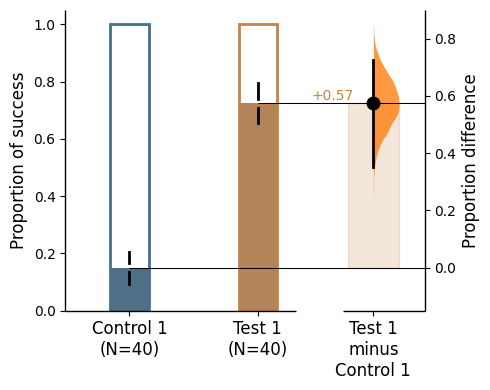

In [ ]:
two_groups_unpaired.mean_diff.plot(bar_width=0.3);

### Bar desaturation

The ``raw_desat`` is used to control the amount of desaturation applied to the bar plot bar colors (specific to unpaired data). A value of 0.0 means full desaturation (i.e., grayscale), 
while a value of 1.0 means no desaturation (i.e., full color saturation). The default one is 0.8.


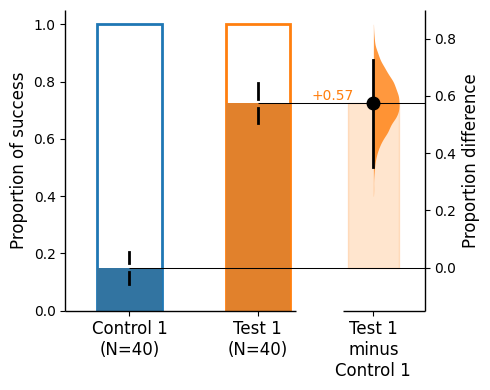

In [ ]:
two_groups_unpaired.mean_diff.plot(raw_desat=1.0);

### Raw Label and Contrast Label
The parameters ``raw_label`` and ``contrast_label`` can be used to set labels for the y-axis of the bar plot and the contrast plot.

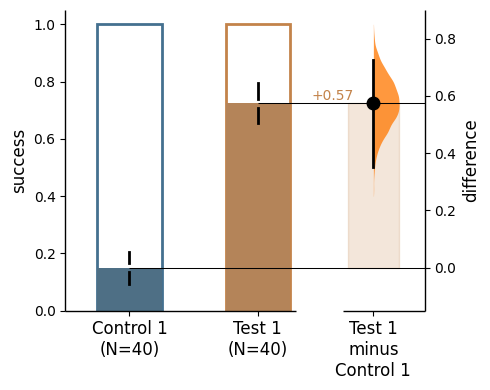

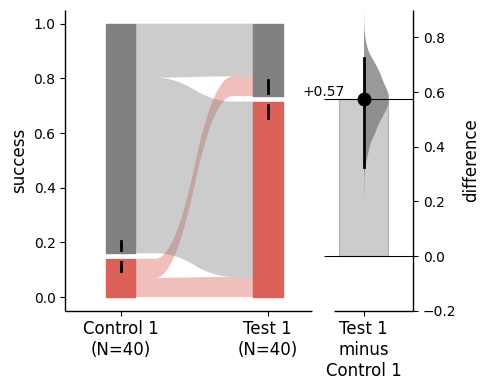

In [ ]:
two_groups_unpaired.mean_diff.plot(raw_label="success",contrast_label="difference");
two_groups_paired.mean_diff.plot(raw_label="success",contrast_label="difference");

### Barplot kwargs
The parameters ``barplot_kwargs`` can be used to alter the aesthetics of the bar plot. This is a dictionary that can be used to pass additional arguments to the bar plot.

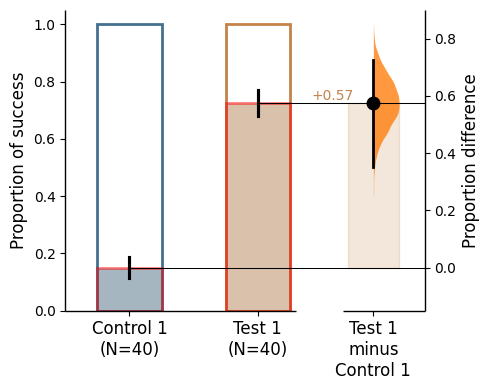

In [ ]:
two_groups_unpaired.mean_diff.plot(barplot_kwargs={"alpha":0.5, "edgecolor":"red", "linewidth":2, 'errorbar': ('sd', 0.1)});

### Sankey and Flow

By changing the ``sankey`` and ``flow`` parameters, you can generate different types of Sankey plots for paired proportions.

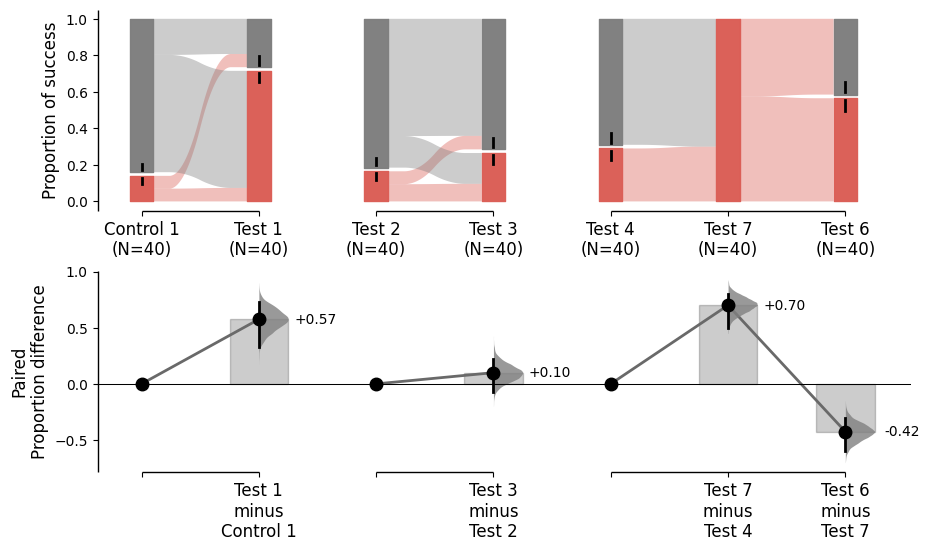

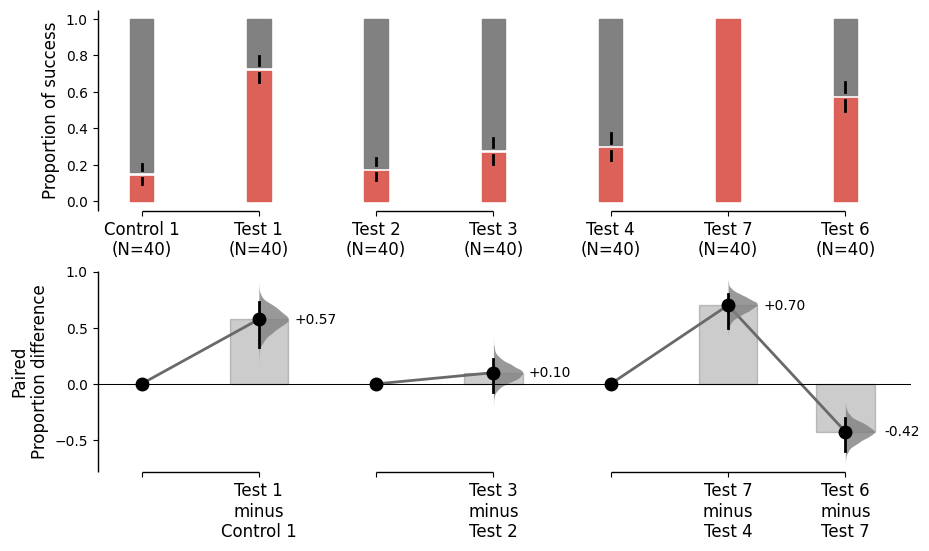

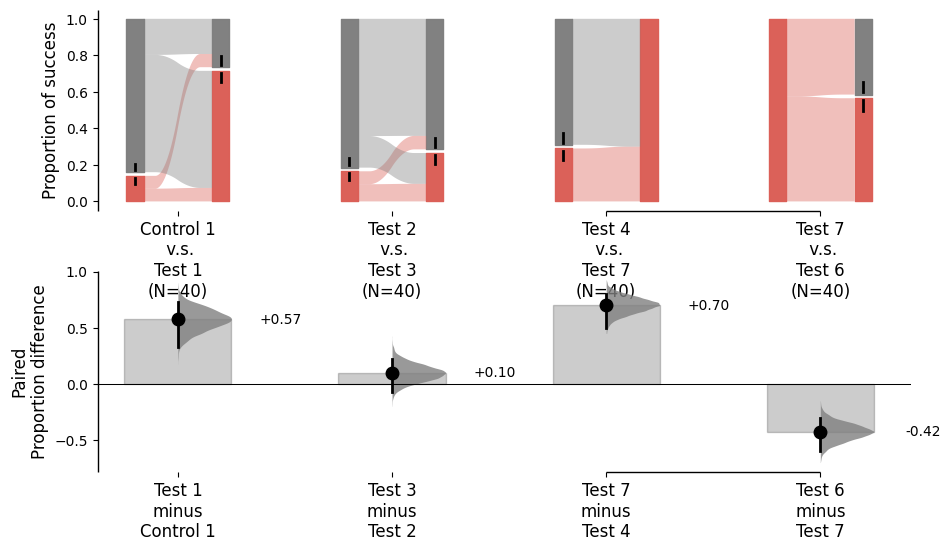

In [ ]:
separate_control = dabest.load(df, idx=((("Control 1", "Test 1"),
                                ("Test 2", "Test 3"),
                                ("Test 4", "Test 7", "Test 6"))),
                    proportional=True, paired="sequential", id_col="ID")

separate_control.mean_diff.plot();
separate_control.mean_diff.plot(sankey_kwargs={'sankey':False});
separate_control.mean_diff.plot(sankey_kwargs={'flow':False});

### Sankey kwargs
Several exclusive parameters can be provided to the ``.plot()`` method to customize the Sankey plots for paired proportions.
By modifying the `sankey_kwargs` parameter, you can customize the Sankey plot. The following parameters are supported:

- **align**: The alignment of each Sankey bar. Default is "center".
- **alpha**: The transparency of each Sankey bar. Default is 0.4.
- **bar_width**: The width of each bar on the side in the plot. Default is 0.1.

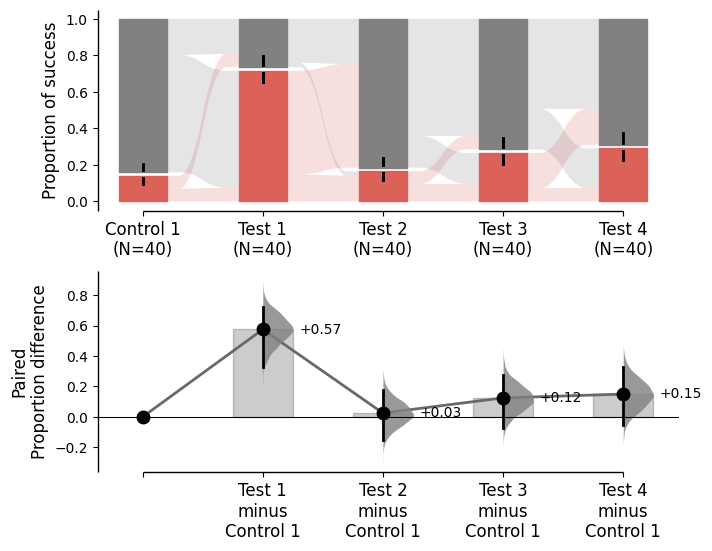

In [ ]:
repeated_measures_baseline.mean_diff.plot(sankey_kwargs = {"alpha": 0.2,
                                                  "bar_width": 0.4});

### Custom Palette

The `custom_palette` parameter functions in a similar way for proportion plots as for other plots - however, there are some differences!

A `custom_palette` dict can be passed for sankey plots, whereby two keys used are 0 and 1. The color associated with these keys will be used to color the bars in the sankey plot.

For bar plots, the `custom_palette` dict can be passed like a regular plot, with a color associated to each group. The chosen color will then be used to color the filled portion of the bar plot.

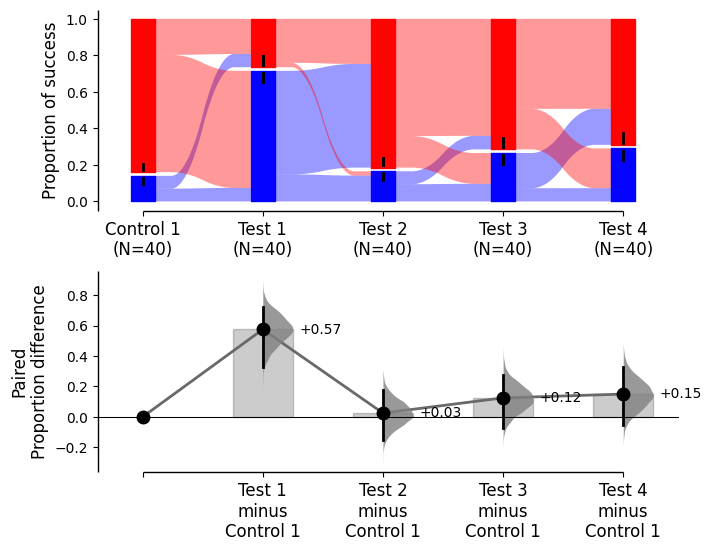

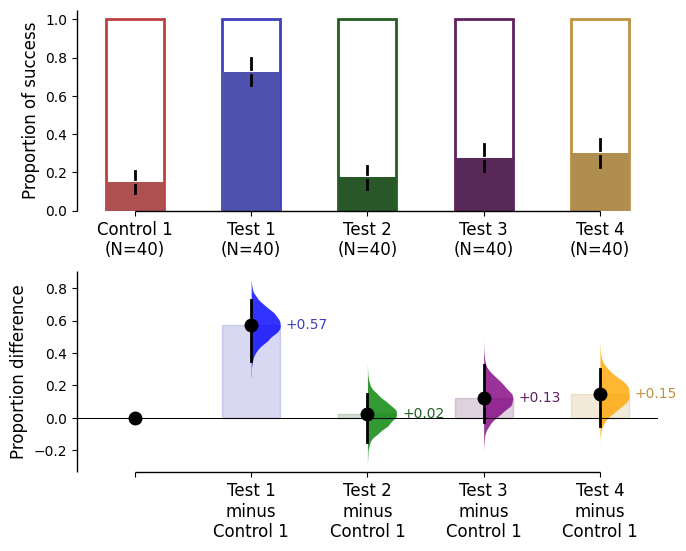

In [ ]:
repeated_measures_baseline.mean_diff.plot(custom_palette={0: "red", 1: "blue"});
shared_control.mean_diff.plot(custom_palette={'Control 1': "red", 'Test 1': "blue", 'Test 2': "green", 'Test 3': "purple", 'Test 4': "orange"});

Similarly, premade matplotlib/seaborn color palette can be passed. For sankey plots, the first two colors in the palette will be used to color the bars in the sankey plot. For bar plots, the colors will be used to color the filled portion of the bar plot.

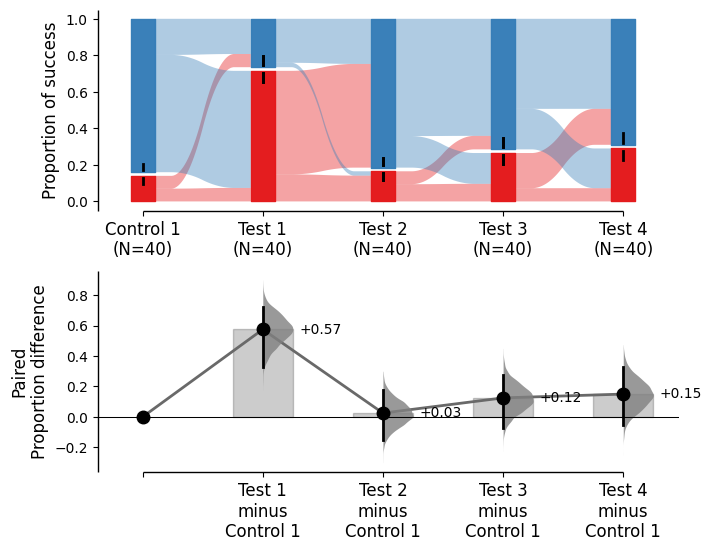

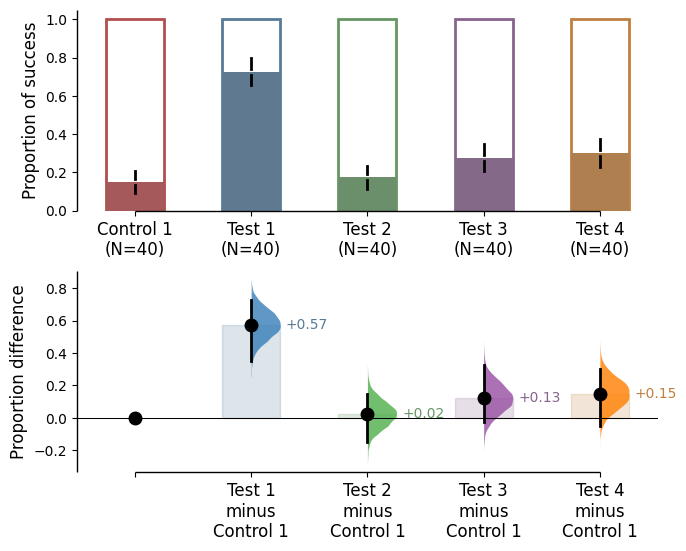

In [ ]:
repeated_measures_baseline.mean_diff.plot(custom_palette='Set1');
shared_control.mean_diff.plot(custom_palette='Set1');

Passing a custom palette list functions differently for bar plots and sankey plots:

- For bar plots, the list should contain the colors associated with each group. 
- For sankey plots, the list should contain two colors, the first color will be used to color the binary '1's, and the second color will be used to color the '0's.


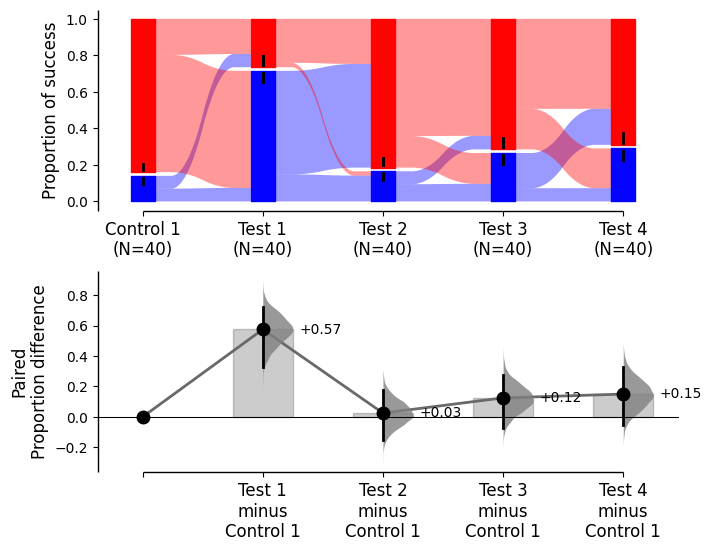

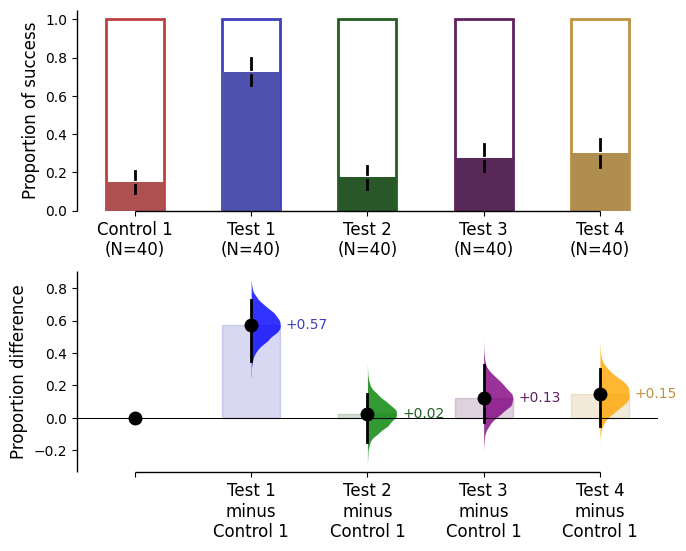

In [ ]:
repeated_measures_baseline.mean_diff.plot(custom_palette=['red', 'blue']);
shared_control.mean_diff.plot(custom_palette=['red', 'blue', 'green', 'purple', 'orange']);

### Add counts to proportion plots

By default, the sample counts for each bar in proportion plots are not shown.

This feature can be turned on by setting `prop_sample_counts=True` in the `.plot()` method.

**Note**: This feature is not compatible with `flow=False` in `sankey_kwargs`.

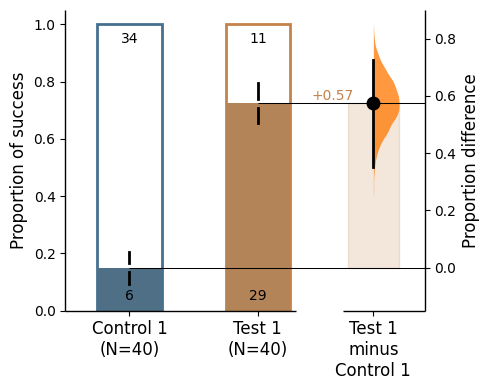

In [ ]:
two_groups_unpaired = dabest.load(df, idx=("Control 1", "Test 1"), proportional=True)
two_groups_unpaired.mean_diff.plot(prop_sample_counts=True);

The sample counts kwargs can be utilised via `prop_sample_counts_kwargs` in the `.plot()` method.

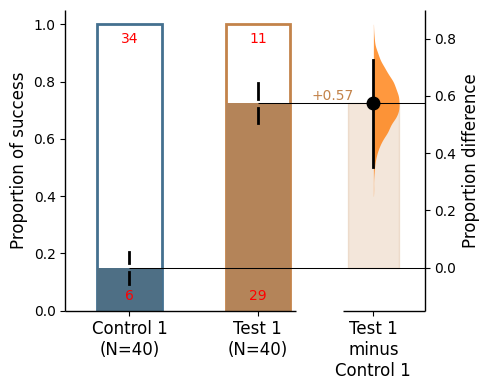

In [ ]:
two_groups_unpaired.mean_diff.plot(prop_sample_counts=True, prop_sample_counts_kwargs={"color":"red"});

For further aesthetic changes, the [Plot Aesthetics Tutorial](08-plot_aesthetics.html) provides detailed examples of how to customize the plot.
